# GMO Analysis

## 1 GMO

### 1. GMO’s approach.

**(a) Why does GMO believe they can more easily predict long-run than short-run asset class
performance?**

**Solution**: They believe that in the long-run, the market is a “weighting machine”, in that prices are
determined by economic fundamentals. Thus, as a macro-strategy fund, they believe their
economic info can predict long-run returns but that short-run returns can be influenced
substantially by behavioral trading.

**(b) What predicting variables does the case mention are used by GMO? Does this fit with the
goal of long-run forecasts?**

**Solution**: The case discusses price-earnings and price-dividend ratios in some detail. Given the high
serial correlation in these variables, it is no surprise that GMO think s their predictive
power is stronger over long-run horizons

**(c) How has this approach led to contrarian positions?**

**Solution**: GMO is, in a macro sense, a value investor. They invest in asset classes with low prices
per cash flow. This means that they are buying into depressed assets and missing out on
assets with large run-ups in price. The case mentions that as GMO missed the bull market
of the late 1990?s, they experienced large withdrawals before ultimately being proven right
in the crash of 2000-2001.

**(d) How does this approach raise business risk and managerial career risk?**

**Solution**:GMO’s contrarian positions put it in some funding risk. If they deviate too much from
other funds during strong performance, clients may want to withdraw money. (Of course,
if GMO can survive, they can show strong performance when other funds are not doing
well.) This is exactly what happened in the late 1990’s.
This same effect impacts managers, who may be rated as missing strong run-ups even if
their contrarian strategy will pay off in the long run.


### 2. The market environment.

**(a) We often estimate the market risk premium by looking at a large sample of historic data.
What reasons does the case give to be skeptical that the market risk premium will be as
high in the future as it has been over the past 50 years?**

**Solution**: The case shows that the price-dividend and price-earning ratios are much higher than their
historic average. This decades-long rise in prices-per-cashflow increased returns, but there
seems to be little room for further gains in P/D and P/E ratios.


**(b) In 2007, GMO forecasts real excess equity returns will be negative. What are the biggest
drivers of their pessimistic conditional forecast relative to the unconditional forecast. (See
Exhibit 9.)**

**Solution**: The two biggest drivers of the negative conditional forecast versus the unconditional forecast
are the expected decline in the dividend-price ratio and the decline in profit margin

**(c) In the 2011 forecast, what components has GMO revised most relative to 2007? Now**

**Solution**: Relative to 2007, the 2011 forecast revises expected bond returns down substantially (from
2% to 0.1%,) while revising expected dividend-price contraction to 0%.

### 3. Consider the asset class forecasts in Exhibit 1.

**(a) Which asset class did GMO estimate to have a negative 10-year return over 2002-2011?**

**Solution**: U.S. Equities is the only class with a negative outlook over that period.

**(b) Which asset classes substantially outperformed GMO’s estimate over that time period?**

**Solution**: While many asset classes outperformed, foreign-government bonds seemed to outperform
the most.

**(c) Which asset classes substantially underperformed GMO’s estimate over that time period?**

**Solution**: U.S. Real Estate and U.S. Tbills are the only classes which under-performed GMO’s estimates.


### 4. Fund Performance.

**(a) In which asset class was GMWAX most heavily allocated throughout the majority of 1997-
2011?**

**Solution**: Based on the chart, through most of the period GMWAX was most heavily allocated in
U.S. Fixed Income.

**(b) Comment on the performance of GMWAX versus its benchmark. (No calculation needed;
simply comment on the comparison in the exhibits.)**

**Solution**: The fund has been quite successful relative to the benchmark, with returns almost double
the benchmark and a Sharpe ratio more than double. We don?t have a long enough series
of returns to do a more involved statistical analysis of the performance.


# 2 Analyzing GMO

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sys
sys.path.insert(0, '../')
from portfolio import *

In [2]:
rets = pd.read_excel('gmo_returns.xlsx',sheet_name='total returns')
rets.set_index('Date',inplace=True)

rets_pre = rets.loc[:'2011',:]
rets_post = rets.loc['2012':,:]

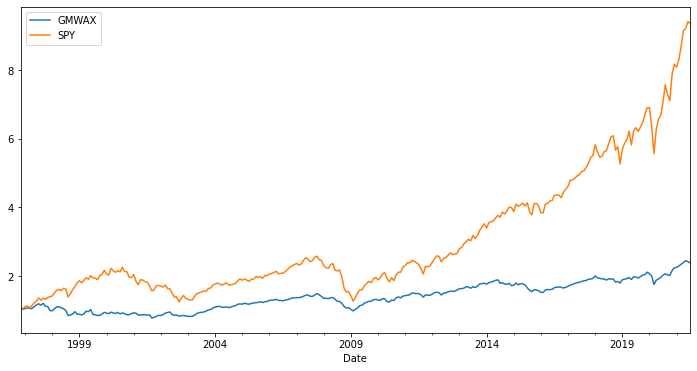

In [3]:
(1+rets).cumprod().plot(figsize=(12,6));

### 1. Summary Stats

In [4]:
df_all = performanceMetrics(rets,annualization=12)
df_pre = performanceMetrics(rets_pre,annualization=12)
df_post = performanceMetrics(rets_post,annualization=12)

performance = pd.concat([df_pre,df_post,df_all], axis=0, keys=['1996-2011','2012-2021','1996-2021'])
performance

Mean       Vol    Sharpe       Min       Max  VaR (0.05)  \
1996-2011 GMWAX  0.032080  0.125137  0.256362 -0.145046  0.085875   -0.056190   
          SPY    0.068653  0.165177  0.415633 -0.165187  0.109147   -0.079423   
2012-2021 GMWAX  0.056622  0.090005  0.629098 -0.118558  0.071406   -0.038521   
          SPY    0.155848  0.129944  1.199352 -0.124871  0.126984   -0.060324   
1996-2021 GMWAX  0.041583  0.112727  0.368883 -0.145046  0.085875   -0.047389   
          SPY    0.102415  0.152766  0.670408 -0.165187  0.126984   -0.073976   

                 CVaR (0.05)  
1996-2011 GMWAX    -0.093648  
          SPY      -0.103500  
2012-2021 GMWAX    -0.059231  
          SPY      -0.080985  
1996-2021 GMWAX    -0.083656  
          SPY      -0.098704

Notes:
- Sharpe is lower than SPY in the entire sample and in all subsamples.
- Mean returns are much lower than SPY, while vol is modestly lower.
- Since the case, (2012-2021,) GMWAX has severely underperformed SPY (roughly half the Sharpe.)

### 2. Tail Risk

See the table above and see the table below for max drawdown.
- Tail risk is lower for GMWAX, as seen in Min, VaR, and CVaR in table above.
- Max drawdown for GMWAX is lower in every subsample, as seen in table below.
- Max drawdown for GMWAX is longer in duration in every subsample.

In [5]:
df_pre = maximumDrawdown(rets_pre)
df_post = maximumDrawdown(rets_post)
df_all = maximumDrawdown(rets)

drawdown = pd.concat([df_pre,df_post,df_all], axis=0, keys=['1996-2011','2012-2021','1996-2021'])
drawdown

Max Drawdown       Peak     Bottom    Recover Peak to Recover
1996-2011 GMWAX     -0.355219 1997-09-30 2001-09-30 2005-02-28       2708 days
          SPY       -0.507848 2007-10-31 2009-02-28        NaT             NaT
2012-2021 GMWAX     -0.195331 2014-06-30 2016-02-29 2017-10-31       1219 days
          SPY       -0.194477 2019-12-31 2020-03-31 2020-07-31        213 days
1996-2021 GMWAX     -0.355219 1997-09-30 2001-09-30 2005-02-28       2708 days
          SPY       -0.507848 2007-10-31 2009-02-28 2012-03-31       1613 days

### 3. Market Regressions

- The beta is roughly 0.5 across all three samples.
- The alpha is negative in both subsamples, but substantially worse post-case.
- The Information Ratio is substantially worse in the second subsample, (post-case.)

In [6]:
df_all = get_ols_metrics(rets[['SPY']], rets[['GMWAX']], annualization=12)
df_pre = get_ols_metrics(rets_pre[['SPY']], rets_pre[['GMWAX']], annualization=12)
df_post = get_ols_metrics(rets_post[['SPY']], rets_post[['GMWAX']], annualization=12)

mktreg = pd.concat([df_pre,df_post,df_all], axis=0, keys=['1996-2011','2012-2021','1996-2021'])
mktreg

mktreg.style.format({
    'alpha': '{:,.2%}'.format,
    'Passive': '{:,.2f}'.format,
    'r-squared': '{:,.2%}'.format,
    'Info Ratio': '{:,.2%}'.format,
})

,,alpha,SPY,r-squared,Info Ratio
1996-2011,GMWAX,-0.50%,0.539500,50.71%,-5.64%
2012-2021,GMWAX,-3.49%,0.587225,71.88%,-73.11%
1996-2021,GMWAX,-1.49%,0.551131,55.78%,-19.83%


### 4. Rolling Beta

- The rolling beta does not range all that much over the 20 years. It stays between .45 and .65.
- It spikes during the financial crisis and in COVID, but overall is in a similar range pre and post case.

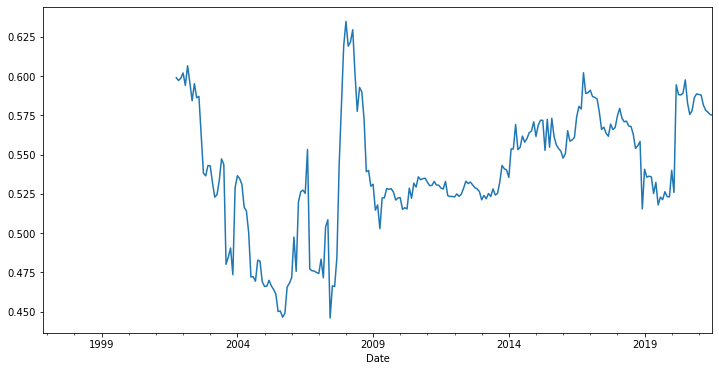

In [7]:
# get rolling covariance matrix
covmat_rolling = rets.rolling(60).cov(rets, pairwise=True)
# don't keep entire cov matrix each period--just keep two elements (SPY,GMWAX) cov and SPY var
spy_rolling_covs = covmat_rolling.drop(['GMWAX'],axis=1).unstack(1).droplevel(0,axis=1)
# convert to beta using formula that beta = cov / var
beta_rolling = spy_rolling_covs['GMWAX'] / spy_rolling_covs['SPY']

beta_rolling.plot(figsize=(12,6));